# Load the dataset

In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# You can find the data under https://drive.google.com/drive/folders/1e550az93U3_kfRBbVY5PZnMKYwGYmHqi?usp=sharing

import pandas as pd
import numpy as np

train_data = pd.read_csv("/content/drive/My Drive/HW1/train_data.csv")  # One line of code
train_label = pd.read_csv("/content/drive/My Drive/HW1/train_label.csv")  # One line of code

test_data = pd.read_csv("/content/drive/My Drive/HW1/test_data.csv")  # One line of code
test_label = pd.read_csv("/content/drive/My Drive/HW1/test_label.csv")  # One line of code

In [71]:
# show random samples from the training data
#print(train_data.shape)
# One line of code
print("Training Data: ",train_data.shape)
train_data.sample(n=10)

Training Data:  (793, 49)
Test Data:  (207, 49)


,id,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,f_worker,checking_status_<0,checking_status_>=200,checking_status_no checking,credit_history_critical/other existing credit,credit_history_delayed previously,credit_history_existing paid,credit_history_no credits/all paid,purpose_domestic appliance,purpose_education,purpose_furniture/equipment,purpose_new car,purpose_other,purpose_radio/tv,purpose_repairs,purpose_retraining,purpose_used car,savings_status_500<=X<1000,savings_status_<100,savings_status_>=1000,savings_status_no known savings,employment_4<=X<7,employment_<1,employment_>=7,employment_unemployed,personal_status_male div/sep,personal_status_male mar/wid,personal_status_male single,other_parties_guarantor,other_parties_none,property_magnitude_life insurance,property_magnitude_no known property,property_magnitude_real estate,other_payment_plans_none,other_payment_plans_stores,housing_own,housing_rent,job_skilled,job_unemp/unskilled non res,job_unskilled resident,own_telephone_yes
560,561,24,2964,4,4,49,1,2,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1
225,226,36,2613,4,2,27,2,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0
261,262,24,1603,4,4,55,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0
492,493,6,1237,1,1,27,2,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,1,0,0,0
597,598,24,4241,1,4,36,3,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0,0,1,1
323,324,18,2659,4,2,28,1,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0
703,704,30,2503,4,2,41,2,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,1,1,0,1,0,0,0
423,424,21,1591,4,3,34,2,1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0,0,0,0
707,708,12,2969,4,3,25,2,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,0
90,91,12,618,4,4,56,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,1,0,1,0,0,0


# Train Decision Tree with default parameters

In [62]:
from sklearn.tree import DecisionTreeClassifier

# Train decision tree using the whole training data with **entropy** criteria

# One line of code
clf = DecisionTreeClassifier(criterion='entropy',random_state=0)
# One line of code
clf = clf.fit(train_data, train_label)

# Estimate the prediction of test data
test_pred = clf.predict(test_data)   # One line of code

# Calculate accuracy of test data
from sklearn.metrics import accuracy_score
TestAcc = accuracy_score(test_label, test_pred)# One line of code
print("Testing Accuracy = %.5f%%" % (TestAcc * 100))

Testing Accuracy = 67.14976%


# FineTune Decision Tree parameters

1- Spliting dataset into train and validation 

In [0]:
# Split training data to 70% training and 30% validation
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(train_data, train_label, test_size=0.3)# One line of code

2- FineTune minimum sample split

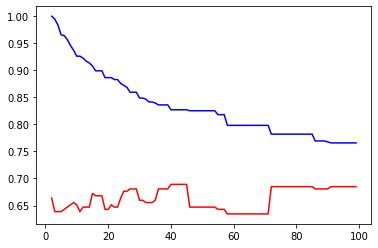

In [64]:
min_samples_splits = range(2, 100)

train_results = []
val_results = []
for min_samples_split in min_samples_splits:
  
  # Fit the tree using the 70% portion of the training data
  # One line of code
  # One line of code
  clf_tune = DecisionTreeClassifier(criterion='entropy',min_samples_split = min_samples_split,random_state=0)
  clf_tune = clf_tune.fit(x_train, y_train)
  
  # Evaluate on Training set
  train_pred = clf_tune.predict(x_train) # One line of code
  train_acc =  accuracy_score(y_train, train_pred) # One line of code
  train_results.append(train_acc)
   
  # Evaluate on Validation set
  val_pred = clf_tune.predict(x_val) # One line of code
  val_acc =  accuracy_score(y_val, val_pred)  # One line of code
  val_results.append(val_acc)
  
# Ploting
import matplotlib.pyplot as plt

plt.plot(min_samples_splits, train_results, 'b')
plt.plot(min_samples_splits, val_results,'r')
plt.show()

In [65]:
# Choose the best minimum split sample based on the plot
Best_minSampl = np.argmax(val_results) # One line of code
print("Best min sample split:",min_samples_splits[Best_minSampl])
# Train decision tree using the full training data and the best minimum split sample
# One line of code
clf_best = DecisionTreeClassifier(criterion='entropy',min_samples_split=min_samples_splits[Best_minSampl],random_state = 0)
# One line of code
clf_best = clf_best.fit(train_data, train_label)

# Estimate the prediction of the test data
test_pred = clf_best.predict(test_data)# One line of code

# Calculate accuracy of test data
TestAcc = accuracy_score(test_label, test_pred) # One line of code
print("Testing Accuracy = %.5f%%" % (TestAcc * 100))

Best min sample split: 40
Testing Accuracy = 71.98068%


In [66]:
#confusion matrix

from sklearn.metrics import confusion_matrix
pd.DataFrame(
    confusion_matrix(test_label, test_pred),
    columns=['Predicted Bad Credit', 'Predicted Good Credit'],
    index=['True Bad Credit', 'True Good Credit'])

,Predicted Bad Credit,Predicted Good Credit
True Bad Credit,25,37
True Good Credit,21,124


# Now, apply the same procedure but using KNN instead of decision tree 

# For finetuning, find the best value of K to use with this dataset.

In [67]:
# Write your code here

from sklearn.neighbors import KNeighborsClassifier

# initialize the values of k to be a list of odd numbers between 1 and 30
kVals = range(1,30,2)

# Save the accuracies of each value of kVal in [accuracies] variable
# hint: you can use accuracies.append(...) function inside the loop
accuracies = []

# loop over values of k for the k-Nearest Neighbor classifier
for k in kVals:

  # Follow what we did in decision tree part
  clf_n = KNeighborsClassifier(n_neighbors=k)  # trained the knn using the 70% portion of the training data
  clf_n.fit(x_train, y_train.values.ravel())

  # Evaluate on Validation set
  result = clf_n.score(x_val,y_val) # One line of code 
  accuracies.append(result)         # One line of code


# Train KNN using the full training data with the best K that you found
i = np.argmax(accuracies)
print("Optimal k-value:",kVals[i])
model = KNeighborsClassifier(n_neighbors=kVals[i])
model.fit(train_data, train_label.values.ravel())

# Predict the labels of the test data
predictions = model.predict(test_data)

# Testing
TestAccuracy = accuracy_score(test_label, predictions)
print("Testing Accuracy = %.5f%%" % (TestAccuracy * 100))


Optimal k-value: 29
Testing Accuracy = 70.53140%


In [68]:
#confusion matrix

pd.DataFrame(
    confusion_matrix(test_label, predictions),
    columns=['Predicted Bad Credit', 'Predicted Good Credit'],
    index=['True Bad Credit', 'True Good Credit'])

,Predicted Bad Credit,Predicted Good Credit
True Bad Credit,5,57
True Good Credit,4,141


# Bonus

# Apply gridsearch using decision tree on any hyperparameter(s) of your choice, you have to beat your previous obtained accuracies to get the bonus


In [69]:
# Write your code here
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe_steps = [("scaler",StandardScaler()),("decsT",DecisionTreeClassifier(random_state=0))]

check_params = {"decsT__criterion": ["gini","entropy"],
                "decsT__max_depth": np.arange(3,25),
                "decsT__min_samples_split": np.arange(2,40)
                }

pipeline = Pipeline(pipe_steps)
#print(pipeline)

create_grid = GridSearchCV(pipeline, param_grid = check_params)
create_grid.fit(train_data, train_label) # was x_train, y_train
print(create_grid.best_params_)

clf_grid = DecisionTreeClassifier(criterion=create_grid.best_params_["decsT__criterion"] , min_samples_split = create_grid.best_params_["decsT__min_samples_split"], max_depth=create_grid.best_params_["decsT__max_depth"],random_state=0)
# One line of code
clf_grid = clf_grid.fit(train_data, train_label)

# Estimate the prediction of the test data
test_predd = clf_grid.predict(test_data)# One line of code

# Calculate accuracy of test data
TestAcc = accuracy_score(test_label, test_predd)
print("Testing Accuracy = %.5f%%" % (TestAcc * 100))



{'decsT__criterion': 'entropy', 'decsT__max_depth': 8, 'decsT__min_samples_split': 22}
Testing Accuracy = 74.39614%


# Report: Write a summary of your approach to this problem; this should be like an abstract of a paper or the executive summary (you aim for clarity and passing on information, not going to details about known facts such as what decision trees are, assuming they are known to people in your research area).

Must include statements such as:


*   Include the problem definition: 1-2 lines
*   Talk about train/val/test sets, size and how split.
*   State what your test results are with the chosen method, parameters: e.g. "We have obtained the best results with the ….. classifier (parameters=....) , giving classification accuracy of …% on test data…."
*   Comment on the speed of the algorithms and anything else that you deem important/interesting (e.g. confusion matrix)



# Report

**Problem Definition:**
  We were given a dataset which consist of the personal information and credit card history of a person, and our goal here was to make a binary classification on whether a single person has good or bad credit risk based on that data. 

  **Methods Used**:

  Decision Tree:

  We first used the decision tree for the classification without spesifiying any (used default parameters with {criterion: entropy ,random state = 0})hyperparameters and used the whole data sets for training. Our training data consist of 793 rows and 49 columns. After we perform the training, we tested our model where our test data consist of 207 rows and 49 columns, and the accuracy rate was 67.14976%. After that, we performed fine tuning based on minimum sample splits ranging between (2,100). For fine,tuning;
we splitted 70% of our training data for training and 30% for the validation data. After performing the training and testing part using the best minimum sample split result which was 40, we get 71.98068% as an accuracy rate.

  KNN:

  The second method we used was KNN. We tried to find the k-value which will give us the highest accuracy rate. Our k-values were the odd numbers ranged between (1,30). After performing fine tuning we found our optimal k value as 29 and trained KNN using the full training data. We get 70.53140% as an accuracy rate.

  **Grid Search:**

  In order to improve our accuracy score in our decision tree model, we performed grid search and try to optimize the hyperparameters. We have obtained the best accuracy score as 74.39614% after setting the parameters such that (decision criteria = entropy, max_depth = 8, and min_samples = 22). The time complexity of this grid search and prediction was longer compared with the other models since it looks for multiple hyperparameter values and tries to find the property that maximizes the overall accuracy score.

**Confusion Matrix:**

If we observe the confusion matrix results which were generated in the above cells, for the decision tree classifer; we can see that our model predicted 37 person as good credit but they should be considered to have bad credit. For the KNN 55 people was considered to have a good credit but they should have bad credit in the actual case. For this reason, decision tree performed better compared with the KNN model, since giving good credit score to a bad score is more risky than giving bad score to a good credit score. Overall, both of our models performed well for predicting the good credit score of a person. 
















  



..

..